In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_dataframe = pd.read_csv('train.csv')

In [5]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Question 1 Who were the passengers on the titanic
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Sex', ylabel='count'>

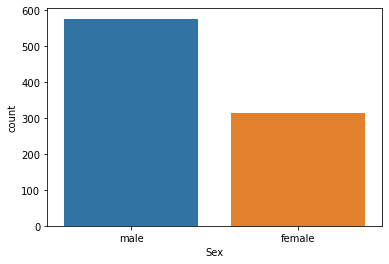

In [22]:
#Gender factor plotting
sns.countplot(x='Sex',data=titanic_dataframe)

<AxesSubplot:xlabel='Sex', ylabel='count'>

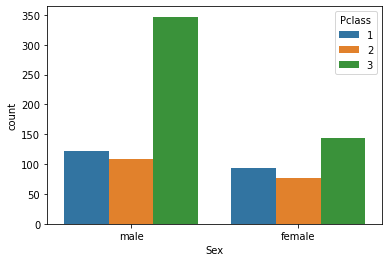

In [23]:
#Seperating genders by classes

sns.countplot(x='Sex',data=titanic_dataframe,hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

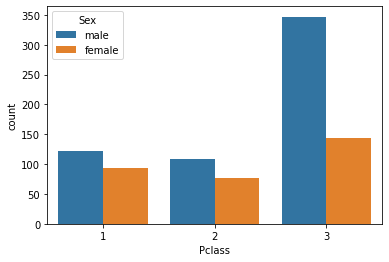

In [25]:
#Reversing the factors

#Much more males and females were in 3rd class also most 3rd class were males
sns.countplot(x='Pclass',data=titanic_dataframe,hue='Sex')

In [27]:
#Checking the line "Women and children first" using the survival rate

def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [28]:
titanic_dataframe['person'] = titanic_dataframe[['Age','Sex']].apply(male_female_child,axis=1)

In [29]:
titanic_dataframe[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

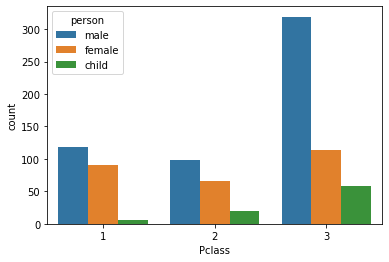

In [30]:
sns.countplot('Pclass',data=titanic_dataframe,hue='person')

<AxesSubplot:>

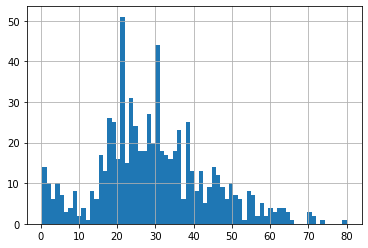

In [31]:
#Percise age plotting

titanic_dataframe['Age'].hist(bins=70)

In [34]:
#Mean of age
titanic_dataframe['Age'].mean()

29.69911764705882

In [35]:
#Overall comparison of male, female and child
titanic_dataframe['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

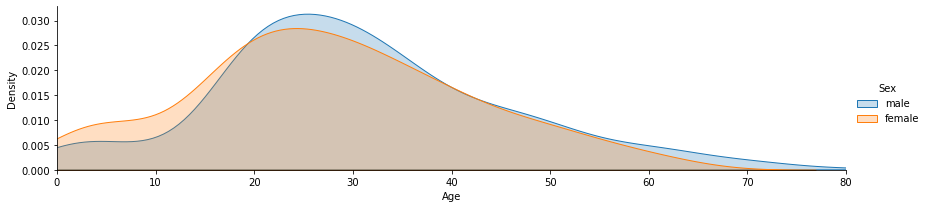

In [38]:
fig = sns.FacetGrid(titanic_dataframe,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade='True')

oldest = titanic_dataframe['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

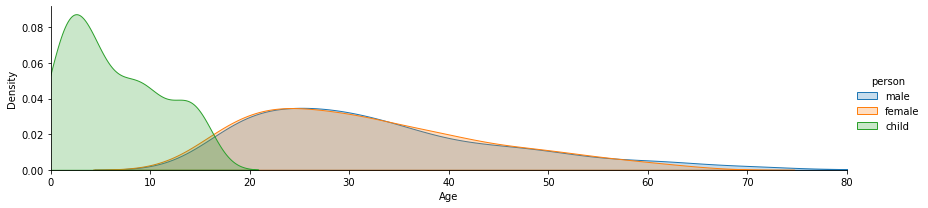

In [39]:
fig = sns.FacetGrid(titanic_dataframe,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade='True')

oldest = titanic_dataframe['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

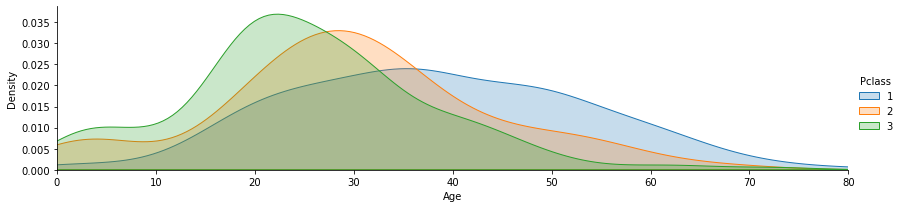

In [40]:
fig = sns.FacetGrid(titanic_dataframe,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade='True')

oldest = titanic_dataframe['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [41]:
#Question 2: What deck were passengers were on and how does that relate to the class?
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [117]:
#Dropping null values in cabin
deck = titanic_dataframe['Cabin'].dropna()

In [118]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

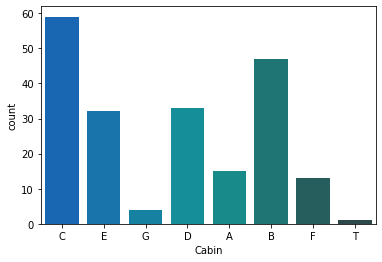

In [122]:
#Cabin ==> C85 ==> First letter is level of ship
# Appending the first letter of all Cabins in levels array
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

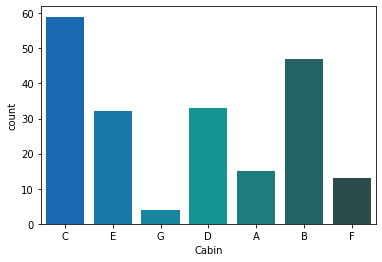

In [120]:
#T cabin is not requires
cabin_df = cabin_df[cabin_df.Cabin != 'T']
cabin_df
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

In [50]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

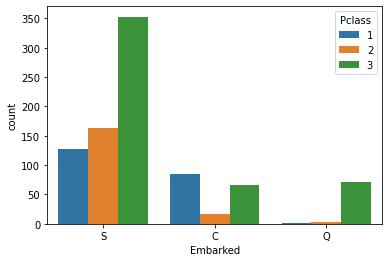

In [53]:
# Embarked column includes S, C and Q 
# S --> Southampton
# C --> Cherbourg
# Q --> Queenstone

sns.countplot('Embarked',data=titanic_dataframe,hue='Pclass')

In [54]:
# Most people from queenstone were in third class

In [56]:
#Question 3: Who was alone and who was with family?
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [58]:
# SibSp means they had siblings on the ship and Parch meaning they had a parent or a child
# If both were zero then they were alone

In [5]:
titanic_dataframe['Alone'] = titanic_dataframe.SibSp + titanic_dataframe.Parch

In [62]:
titanic_dataframe['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [63]:
# So the zeros is all alone
titanic_dataframe['Alone'].loc[titanic_dataframe['Alone'] > 0] = 'with family'
titanic_dataframe['Alone'].loc[titanic_dataframe['Alone'] == 0] = 'Alone'

C:\Users\Abhinav\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [64]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alone', ylabel='count'>

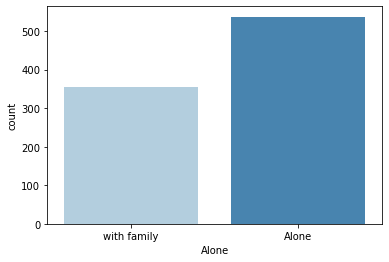

In [65]:
sns.countplot('Alone',data=titanic_dataframe,palette='Blues')

In [67]:
titanic_dataframe['Survivor'] = titanic_dataframe.Survived.map({0: 'no',1:'yes'})

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survivor', ylabel='count'>

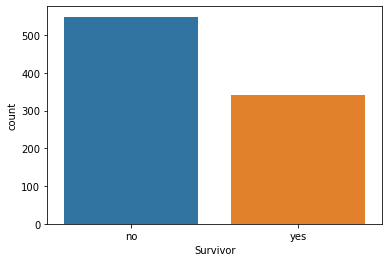

In [69]:
sns.countplot('Survivor',data=titanic_dataframe)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


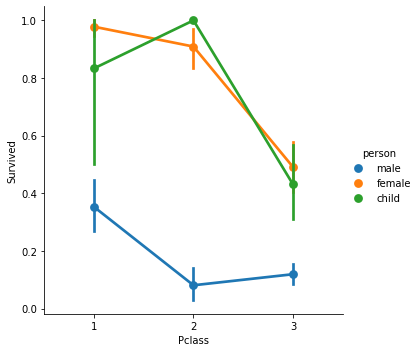

In [73]:
# Checking if class was a factor 
sns.factorplot(x='Pclass',y='Survived',hue='person',data=titanic_dataframe)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


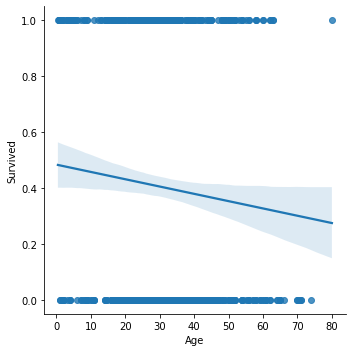

In [74]:
# Does age be a factor in survival
sns.lmplot('Age','Survived',data=titanic_dataframe)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


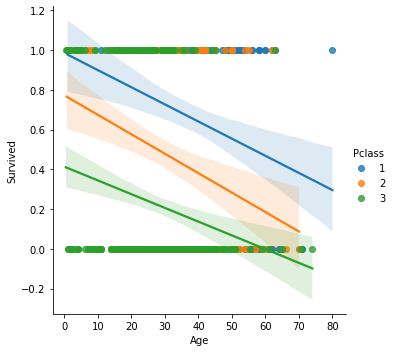

In [75]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_dataframe)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


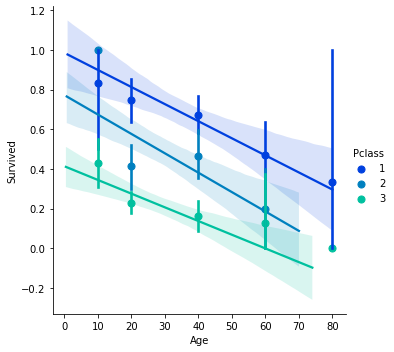

In [76]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_dataframe,palette='winter'
           ,x_bins=generations)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


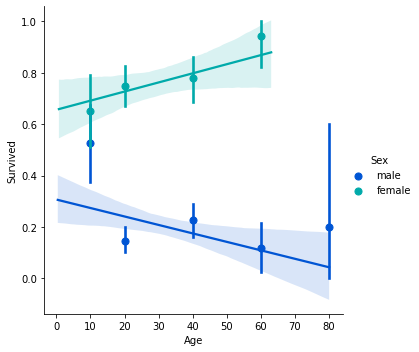

In [77]:
# How gender and age relate with survival
sns.lmplot('Age','Survived',hue='Sex',data=titanic_dataframe,palette='winter',x_bins=generations)

In [29]:
# Did the deck have an affect on survival rate, and how does it affect on male or a female
# Does having a family member affect the rate of survival

# Deck vs survival rate
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
deckframe = DataFrame(titanic_dataframe[['Cabin','Survived']])
def deckSurvive(data):
    cabin,survive = data
    if survive == 0 and str(cabin) == str(np.nan) or survive == 1 and str(cabin) == str(np.nan):
        return 'idk'
    else:
        return cabin
deckframe['data'] = deckframe[['Cabin','Survived']].apply(deckSurvive,axis=1)
newDeckframe = DataFrame(deckframe[deckframe.data != 'idk'])
newDeckframe

,Cabin,Survived,data
1,C85,1,C85
3,C123,1,C123
6,E46,0,E46
10,G6,1,G6
11,C103,1,C103
...,...,...,...
871,D35,1,D35
872,B51 B53 B55,0,B51 B53 B55
879,C50,1,C50
887,B42,1,B42


In [255]:
firstletter = []
for deck in newDeckframe['data']:
    firstletter.append(deck[0])

newDeckframe['cabinletter'] = firstletter 
newDeckframe

,Cabin,Survived,data,cabinletter
1,C85,1,C85,C
3,C123,1,C123,C
6,E46,0,E46,E
10,G6,1,G6,G
11,C103,1,C103,C
...,...,...,...,...
871,D35,1,D35,D
872,B51 B53 B55,0,B51 B53 B55,B
879,C50,1,C50,C
887,B42,1,B42,B


<AxesSubplot:xlabel='cabinletter', ylabel='count'>

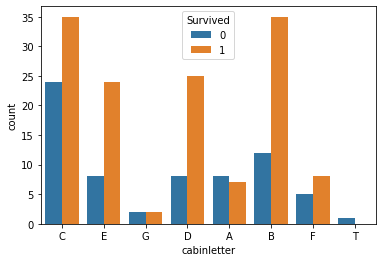

In [260]:
sns.countplot(x='cabinletter',hue='Survived',data=newDeckframe)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


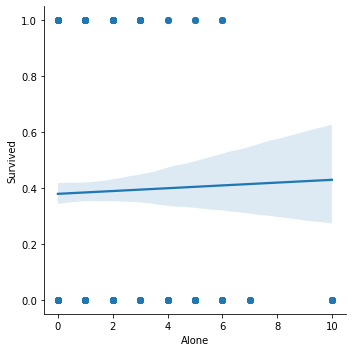

In [15]:
# Alone and rate of survival
sns.lmplot('Alone','Survived',data=titanic_dataframe)